<a href="https://colab.research.google.com/github/ankit-singh973/Targeted_Protein_Degradation/blob/main/3_Train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi -q

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
working_directory = "/content/drive/MyDrive/Protacs_new_dataset/"
os.chdir(working_directory)
print("current working directory is: ", os.getcwd())

current working directory is:  /content/drive/MyDrive/Protacs_new_dataset


In [ ]:
data_dir = os.path.join(os.getcwd(), 'data')
src_dir = os.path.join(os.getcwd(), 'src')
fig_dir = os.path.join(data_dir, 'figures')
checkpoint_dir = os.path.join(os.getcwd(), 'checkpoints')
dirs_to_make = [
    data_dir,
    os.path.join(data_dir, 'raw'),
    os.path.join(data_dir, 'processed'),
    os.path.join(data_dir, 'train'),
    os.path.join(data_dir, 'val'),
    os.path.join(data_dir, 'test'),
    src_dir,
    fig_dir,
    checkpoint_dir,
]
for d in dirs_to_make:
    if not os.path.exists(d):
        os.makedirs(d)

In [ ]:
final_df = pd.read_csv("data/raw/Protac_final_database.csv")
final_df.head()

,Compound ID,Uniprot,Smiles,E3 Ligase,Cell Type,DC50 (nM),Dmax (%),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,53.0,100.0,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...


In [ ]:
final_df.shape

(2141, 10)

In [ ]:
final_df.columns

Index(['Compound ID', 'Uniprot', 'Smiles', 'E3 Ligase', 'Cell Type',
       'DC50 (nM)', 'Dmax (%)', 'POI Sequence', 'E3 Ligase Uniprot',
       'E3 Ligase Sequence'],
      dtype='object')

In [ ]:
final_df.describe()

,Compound ID,DC50 (nM),Dmax (%)
count,2141.000000,1350.000000,812.000000
mean,1145.812704,1576.777909,71.064951
std,909.770731,7028.700081,28.232100
min,1.000000,0.010000,0.030000
25%,392.000000,9.025000,50.000000
50%,885.000000,50.000000,82.000000
75%,1758.000000,398.375000,95.000000
max,3270.000000,100000.000000,100.000000


In [ ]:
final_df = final_df.rename(columns={'DC50 (nM)': 'DC50', 'Dmax (%)': 'Dmax'})
final_df.head()

,Compound ID,Uniprot,Smiles,E3 Ligase,Cell Type,DC50,Dmax,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,53.0,100.0,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...


In [ ]:
# Convert DC50 to -log10
final_df['pDC50'] = -np.log10(final_df['DC50'] / 1e9)
# final_df["Dmax"] = final_df["Dmax"] / 100

In [ ]:
final_df.describe()

,Compound ID,DC50,Dmax,pDC50
count,2141.000000,1350.000000,812.000000,1350.000000
mean,1145.812704,1576.777909,71.064951,7.239382
std,909.770731,7028.700081,28.232100,1.208957
min,1.000000,0.010000,0.030000,4.000000
25%,392.000000,9.025000,50.000000,6.399708
50%,885.000000,50.000000,82.000000,7.301030
75%,1758.000000,398.375000,95.000000,8.044558
max,3270.000000,100000.000000,100.000000,11.000000


## **Let's define the activity column**

In [ ]:
# import numpy as np
# import pandas as pd

# def label_activity(row) -> str:
#     """
#     Label a data sample as active or inactive based on pDC50 and Dmax in a DataFrame.

#     Args:
#         row (pd.Series): A row from the DataFrame containing 'pDC50' and 'Dmax'.

#     Returns:
#         str: "active" if conditions are met, "inactive" if not, or np.nan if both are NaN.
#     """
#     pDC50 = row['pDC50']
#     Dmax = row['Dmax']

#     # Check if pDC50 and Dmax are NaN
#     if pd.isna(pDC50) and pd.isna(Dmax):
#         return np.nan

#     # Check conditions for being labeled active
#     if (pd.notna(pDC50) and pDC50 >= 7) or (pd.notna(Dmax) and Dmax >= 60):
#         return "active"

#     return "inactive"


# # df = pd.DataFrame(data)

# # # Calculate pDC50 from DC50 (convert DC50 to pDC50)
# # df['pDC50'] = -np.log10(df['DC50'] * 1e-9)

# # Apply the labeling function to each row to create a new 'Activity' column
# final_df['Activity'] = final_df.apply(label_activity, axis=1)

# # # Show the results
# # print(df[['DC50', 'Dmax', 'pDC50', 'Activity']])

In [ ]:
# import numpy as np
# import pandas as pd

# def label_activity(pDC50, Dmax) -> str:
#     """
#     Label a data sample based on pDC50 and Dmax values.

#     Args:
#         pDC50 (float): The pDC50 value of the sample.
#         Dmax (float): The Dmax value of the sample.

#     Returns:
#         str or np.nan: "active" if conditions are met, "inactive" if not, or np.nan if any value is missing.
#     """
#     # Check if either pDC50 or Dmax is missing
#     if pd.isna(pDC50) or pd.isna(Dmax):
#         return np.nan

#     # Check conditions for being labeled active
#     if pDC50 >= 7 and Dmax >= 60:
#         return "active"

#     return "inactive"


# # Apply the labeling function to the DataFrame
# final_df['Activity'] = final_df.apply(lambda row: label_activity(row['pDC50'], row['Dmax']), axis=1)

# # # Show the results
# # print(df[['pDC50', 'Dmax', 'Activity']])

In [ ]:
def is_active(DC50: float, Dmax: float, oring=False) -> bool:
    """ Check if a PROTAC is active based on DC50 and Dmax.
    Args:
        DC50(float): DC50 in nM
        Dmax(float): Dmax in %
    Returns:
        bool: True if active, False if inactive, np.nan if either DC50 or Dmax is NaN
    """
    pDC50 = -np.log10(DC50 * 1e-9) if pd.notnull(DC50) else np.nan
    Dmax = Dmax / 100
    if pd.notnull(pDC50):
        if pDC50 < 7.0:
            return False
    if pd.notnull(Dmax):
        if Dmax < 0.8:
            return False
    if oring:
        if pd.notnull(pDC50):
            return True if pDC50 >= 7.0 else False
        elif pd.notnull(Dmax):
            return True if Dmax >= 0.8 else False
        else:
            return np.nan
    else:
        if pd.notnull(pDC50) and pd.notnull(Dmax):
            return True if pDC50 >= 7.0 and Dmax >= 0.8 else False
        else:
            return np.nan

Non-Nan Active: 1087


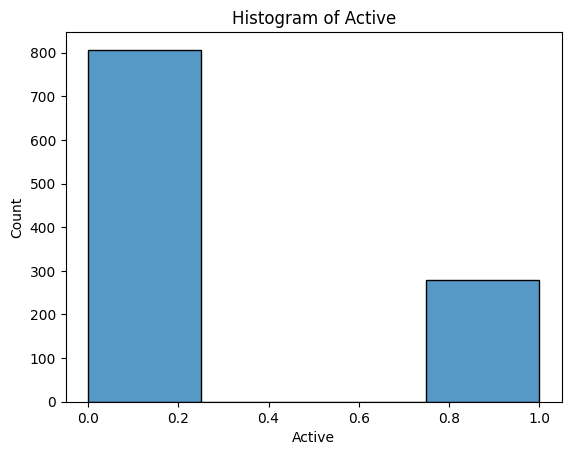

In [ ]:
final_df['Active'] = final_df.apply(
    lambda row: is_active(row['DC50'], row['Dmax']),
    axis=1,
)

print(f'Non-Nan Active: {len(final_df[final_df["Active"].notnull()])}')

# Histogram of Active
sns.histplot(data=final_df, x='Active', bins=4)
plt.title('Histogram of Active')
plt.show()

In [ ]:
final_df['Activity'] = final_df.apply(
    lambda row: is_active(row['DC50'], row['Dmax'], oring=True), axis=1,
)

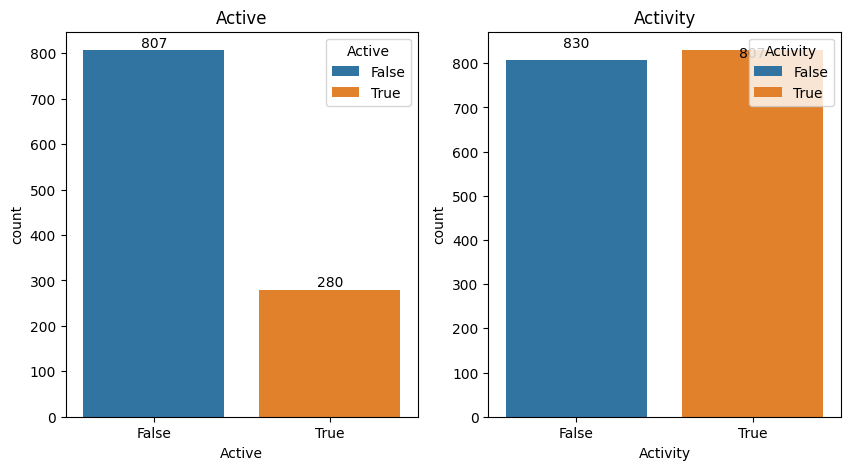

In [ ]:
# @title plot the columns Active and 'Activity' side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title('Active')
axes[1].set_title('Activity')
sns.countplot(data=final_df, x='Active', hue = "Active", ax=axes[0])
sns.countplot(data=final_df, x='Activity', hue = "Activity", ax=axes[1])

for i, count in enumerate(final_df['Active'].value_counts()):
    axes[0].text(i, count, count, ha='center', va='bottom')
for i, count in enumerate(final_df['Activity'].value_counts()):
    axes[1].text(i, count, count, ha='center', va='bottom')
plt.show()

In [ ]:
final_df.isna().sum()

Compound ID              0
Uniprot                  0
Smiles                   0
E3 Ligase                0
Cell Type               88
DC50                   791
Dmax                  1329
POI Sequence             0
E3 Ligase Uniprot        0
E3 Ligase Sequence       0
pDC50                  791
Active                1054
Activity               504
dtype: int64

In [ ]:
final_df['Activity'].value_counts()

Activity
True     830
False    807
Name: count, dtype: int64

In [ ]:
final_df

,Compound ID,Uniprot,Smiles,E3 Ligase,Cell Type,DC50,Dmax,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,pDC50,Active,Activity
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN,NaN,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN,NaN,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN,NaN,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN,NaN,NaN
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,53.0,100.0,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,7.275724,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2342,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,HEK293,63.1,NaN,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,7.199971,NaN,True
2137,2887,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,A549,125.9,NaN,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,6.899974,False,False
2138,2889,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,A549,158.5,NaN,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,6.799971,False,False
2139,2890,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,A549,31.6,NaN,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,7.500313,NaN,True


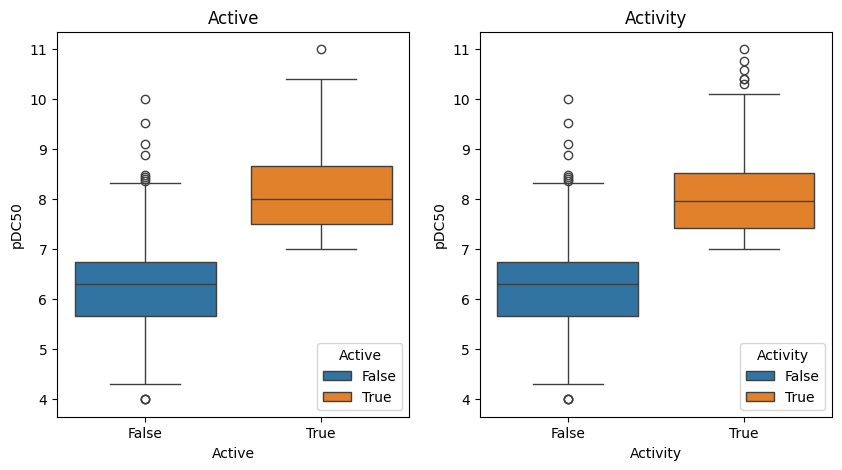

In [ ]:
# @title Active vs Activity

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title('Active')
axes[1].set_title('Activity')
sns.boxplot(data=final_df, x='Active', y = "pDC50", hue = "Active", ax=axes[0])
sns.boxplot(data=final_df, x='Activity', y = 'pDC50', hue = "Activity",ax=axes[1])

plt.show()

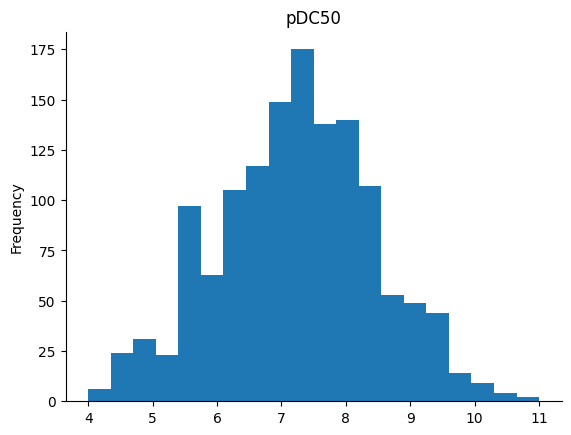

In [ ]:
# @title pDC50

from matplotlib import pyplot as plt
final_df['pDC50'].plot(kind='hist', bins=20, title='pDC50')
plt.gca().spines[['top', 'right',]].set_visible(False)

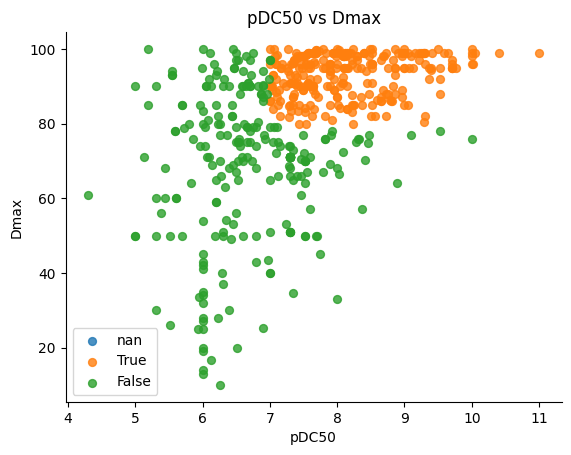

In [ ]:
# @title pDC50 vs Dmax

import matplotlib.pyplot as plt

for activity in final_df['Active'].unique():
    subset = final_df[final_df['Active'] == activity]
    plt.scatter(subset['pDC50'], subset['Dmax'], label= activity, s=32, alpha=0.8)

plt.xlabel('pDC50')
plt.ylabel('Dmax')
plt.title('pDC50 vs Dmax')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

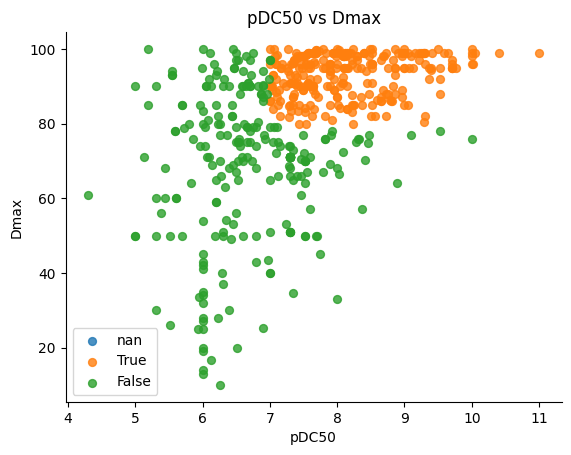

In [ ]:
# @title pDC50 vs Dmax

import matplotlib.pyplot as plt


for activity in final_df['Activity'].unique():
    subset = final_df[final_df['Activity'] == activity]
    plt.scatter(subset['pDC50'], subset['Dmax'], label= activity, s=32, alpha=0.8)

plt.xlabel('pDC50')
plt.ylabel('Dmax')
plt.title('pDC50 vs Dmax')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

In [ ]:
final_df.columns

Index(['Compound ID', 'Uniprot', 'Smiles', 'E3 Ligase', 'Cell Type', 'DC50',
       'Dmax', 'POI Sequence', 'E3 Ligase Uniprot', 'E3 Ligase Sequence',
       'pDC50', 'Active', 'Activity'],
      dtype='object')

In [ ]:
final_df_new = final_df[['Uniprot', 'Smiles', 'E3 Ligase', 'Cell Type','POI Sequence', 'E3 Ligase Uniprot', 'E3 Ligase Sequence', 'Activity']]

In [ ]:
final_df_new

,Uniprot,Smiles,E3 Ligase,Cell Type,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Activity
0,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN
1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN
2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN
3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,NaN
4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True
...,...,...,...,...,...,...,...,...
2136,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,HEK293,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True
2137,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,A549,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,False
2138,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,A549,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,False
2139,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,A549,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True


In [ ]:
final_df_new.isna().sum()

Uniprot                 0
Smiles                  0
E3 Ligase               0
Cell Type              88
POI Sequence            0
E3 Ligase Uniprot       0
E3 Ligase Sequence      0
Activity              504
dtype: int64

In [ ]:
final_df_new.dropna(subset=['Activity', "Cell Type"], inplace=True)
final_df_new = final_df_new.reset_index(drop=True)

<ipython-input-116-d5fcd2dadb2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_new.dropna(subset=['Activity', "Cell Type"], inplace=True)


In [ ]:
final_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Uniprot             1604 non-null   object
 1   Smiles              1604 non-null   object
 2   E3 Ligase           1604 non-null   object
 3   Cell Type           1604 non-null   object
 4   POI Sequence        1604 non-null   object
 5   E3 Ligase Uniprot   1604 non-null   object
 6   E3 Ligase Sequence  1604 non-null   object
 7   Activity            1604 non-null   object
dtypes: object(8)
memory usage: 100.4+ KB


In [ ]:
final_df_new["Activity"].value_counts()

Activity
True     807
False    797
Name: count, dtype: int64

In [ ]:
final_df_new["Cell Type"].value_counts()

Cell Type
K562                                    111
LNCaP                                    85
SRD15                                    76
HCT116                                   71
MCF-7                                    69
                                       ... 
OCI-AML3                                  1
Kasumi-1                                  1
NB4                                       1
H1666                                     1
ER-positive breast cancer cell lines      1
Name: count, Length: 174, dtype: int64

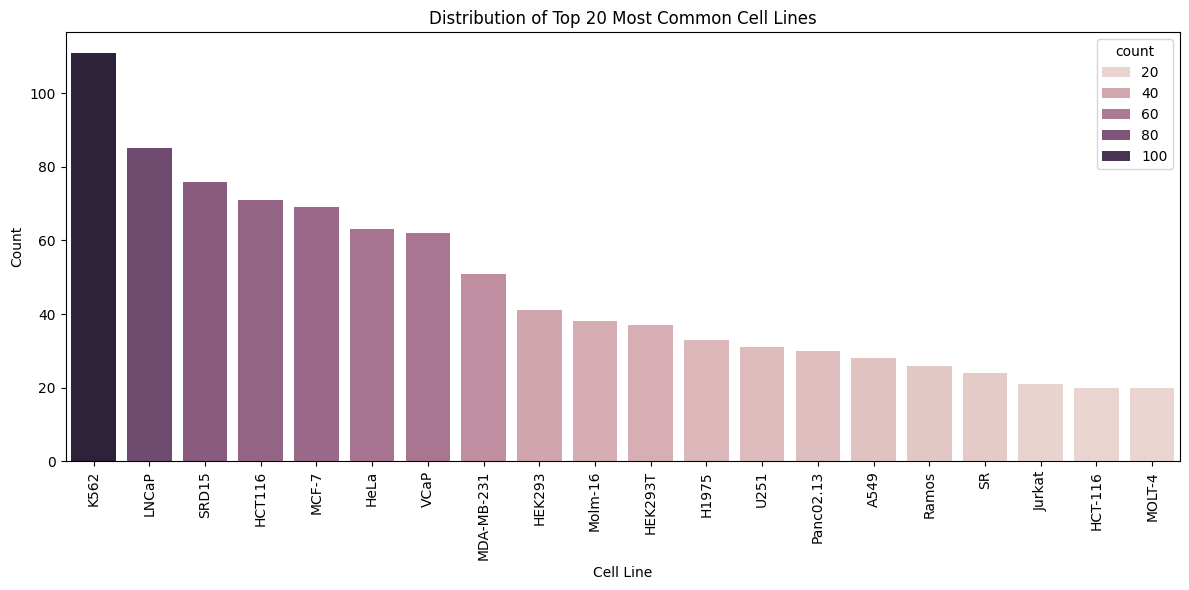

In [ ]:

cell_line_counts = final_df_new['Cell Type'].value_counts()

top_20_cell_lines = cell_line_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cell_lines.index, hue = top_20_cell_lines, y=top_20_cell_lines.values)
plt.xticks(rotation=90)
plt.xlabel('Cell Line')
plt.ylabel('Count')
plt.title('Distribution of Top 20 Most Common Cell Lines')
plt.tight_layout()
plt.show()


In [ ]:
cell_lines = final_df_new["Cell Type"].unique()
cell_lines

array(['MOLT-4', 'H1975', 'PBMCs', 'K562', 'MCF-7', 'Hs578t', 'THP',
       'HCC827', 'MOLM14', 'Panc02.13', 'HeLa', 'HCT116',
       'Human THP-1 monocytes', 'MCF-7 breast cancer cells', 'NAMALWA',
       'MV-4-11', 'MDA-MB-468', 'PC-3', 'LNCaP', '22Rv1', 'AML cells',
       'H661', 'VCaP', 'THP1', 'PC3', 'hela', 'Karpas422', 'U251', 'MM1S',
       'Ramos', 'LnCap', 'HEK293', 'MOLT4', 'MDA-MB-231', 'SR', 'THP-1',
       'Hella', 'RS4;11', 'GFP-KRASG12C reporter cell line in Flp-In 293',
       'HEK293T', 'WI38 platelets', 'THPT1',
       'KYSE520 esophageal cancer cell line', 'NCI-H2030', 'SW1573',
       'SU-DHL-1', 'PA1', 'HT1080', 'HepG2', 'SRD15', 'A549', 'Huh7',
       'RI-1', 'EOL-1', 'A-204', 'T47D', 'VCaP AR+', 'NCI-H661',
       'NCI-H838', 'NCI-H2228', '22RV1', 'Jurkat', 'RAMOS', 'HBL-1',
       'Mino', 'IgE MM', 'OVCAR8', 'H3255', 'XLA', 'LnCaP95', 'Namalwa',
       'CA-46', 'SUM149', 'MV4-11', 'HD-MB03', 'Molm-16', '293T', 'H3122',
       'Karpas 299', 'Kelly', 'RS4; 11', 

In [ ]:
final_df_new.shape

(1604, 9)

# **Train Test val Split**

## **Different ways to split dataset**
> **1. Stratified Split**

> **2. Scaffold Split**

> **3. Cluster Split**

**Note:** Before applying cluster split we need to find the best fingerprints through `GridSearchCV`

## **1. Stratified Split**
* Ensures that the proportion of different classes in the training and testing sets is similar to the original dataset.
* Useful when dealing with imbalanced datasets to ensure that each class is represented proportionally.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def stratified_split(df, stratify_col, train_size=0.7, val_size=0.2, test_size=0.1, random_state=42):

    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "The sum of train, val, and test sizes must be 1"

    df_train_val, df_test = train_test_split(
        df, test_size=test_size, random_state=random_state, stratify=df[stratify_col]
    )

    relative_val_size = val_size / (train_size + val_size)
    df_train, df_val = train_test_split(
        df_train_val, test_size=relative_val_size, random_state=random_state, stratify=df_train_val[stratify_col]
    )

    return df_train, df_val, df_test

train_df, val_df, test_df = stratified_split(final_df_new, stratify_col='Activity')

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 1122
Validation size: 321
Test size: 161


In [ ]:
train_df.to_csv(os.path.join(data_dir, 'train', 'stratified_train_data.csv'), index=False)
val_df.to_csv(os.path.join(data_dir, 'val', 'stratified_val_data.csv'), index=False)
test_df.to_csv(os.path.join(data_dir, 'test', 'stratified_test_data.csv'), index=False)

In [ ]:
train_df["Activity"].value_counts()

Activity
True     564
False    558
Name: count, dtype: int64

In [ ]:
val_df["Activity"].value_counts()

Activity
True     162
False    159
Name: count, dtype: int64

## **2. Scaffold Split**
* Splits the dataset based on molecular scaffolds, ensuring that the same scaffold does not appear in both training and testing sets.
* Used to test the model's ability to generalize to novel chemical structures.

In [ ]:
!pip install rdkit-pypi -q

In [ ]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

### Bemis-Murcko scaffold
 * It represents the core structure of a compound by simplifying and removing side chains and substituents, highlighting the essential connections and rings within the molecule.
 * **Purpose:** It helps in the identification of chemical scaffolds that may serve as templates for drug design, enabling researchers to understand the relationship between structure and biological activity.

In [ ]:
# Bemis-Murcko scaffold
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return MurckoScaffold.MurckoScaffoldSmiles(mol=mol)

def scaffold_split(df, smiles_col, train_size=0.7, val_size=0.2, test_size=0.1, random_state=42):
    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "The sum of train, val, and test sizes must be 1"

    df['scaffold'] = df[smiles_col].apply(get_scaffold)

    df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    scaffolds = df['scaffold'].unique()

    train_cutoff = int(len(scaffolds) * train_size)
    val_cutoff = int(len(scaffolds) * (train_size + val_size))

    train_scaffolds = scaffolds[:train_cutoff]
    val_scaffolds = scaffolds[train_cutoff:val_cutoff]
    test_scaffolds = scaffolds[val_cutoff:]

    train_df = df[df['scaffold'].isin(train_scaffolds)]
    val_df = df[df['scaffold'].isin(val_scaffolds)]
    test_df = df[df['scaffold'].isin(test_scaffolds)]

    train_df = train_df.drop(columns=['scaffold'])
    val_df = val_df.drop(columns=['scaffold'])
    test_df = test_df.drop(columns=['scaffold'])

    return train_df, val_df, test_df

train_df, val_df, test_df = scaffold_split(final_df_new, smiles_col='Smiles')




In [ ]:
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 1262
Validation size: 245
Test size: 97


In [ ]:
train_df.to_csv(os.path.join(data_dir, 'train', 'scaffold_train_data.csv'), index=False)
val_df.to_csv(os.path.join(data_dir, 'val', 'scaffold_val_data.csv'), index=False)
test_df.to_csv(os.path.join(data_dir, 'test', 'scaffold_test_data.csv'), index=False)


In [ ]:
train_df['Activity'].value_counts()


Activity
True     644
False    618
Name: count, dtype: int64

In [ ]:
final_df_new.columns

Index(['Uniprot', 'Smiles', 'E3 Ligase', 'Cell Type', 'POI Sequence',
       'E3 Ligase Uniprot', 'E3 Ligase Sequence', 'Activity', 'scaffold'],
      dtype='object')

In [ ]:
final_df_new.to_csv(os.path.join(data_dir, 'processed', 'final_df_new.csv'), index=False)

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'processed', 'final_df_new.csv'))
df.head()

,Uniprot,Smiles,E3 Ligase,Cell Type,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Activity,scaffold
0,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(CCCCCC(=O)N1CCN(CCC(CSc2ccccc2)Nc2ccc(S(=O...
1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(CCCCCN1CCN(CCC(CSc2ccccc2)Nc2ccc(S(=O)(=O)...
2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(CCCCCCNCCC(CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=...
3,Q07817,CC1(C)CCC(c2ccc(Cl)cc2)=C(CN2CCN(c3ccc(C(=O)NS...,CRBN,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,True,O=C1CCC(N2C(=O)c3cccc(NCCOCCOCCOCCN4CCN(CCC(CS...
4,Q07817,CN(CCCCCCCn1cc(COCCOCCNc2cccc3c2C(=O)N(C2CCC(=...,CRBN,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,True,O=C1CCC(N2C(=O)c3cccc(NCCOCCOCc4cn(CCCCCCCNCCC...


## **3. Cluster Split**
 * Ensure that all examples of a particular cluster are either in the training set or the validation set, but not both.
 * **Purpose:** To enhance model accuracy and generalizability

In [ ]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
# @title Compute Morgan fingerprints
def compute_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=4, nBits=2048)
    return fp


In [ ]:
df['fingerprints'] = df['Smiles'].apply(compute_fingerprints)
df = df.dropna(subset=['fingerprints'])

In [ ]:
fingerprints = list(df['fingerprints'].apply(lambda x: list(x)))

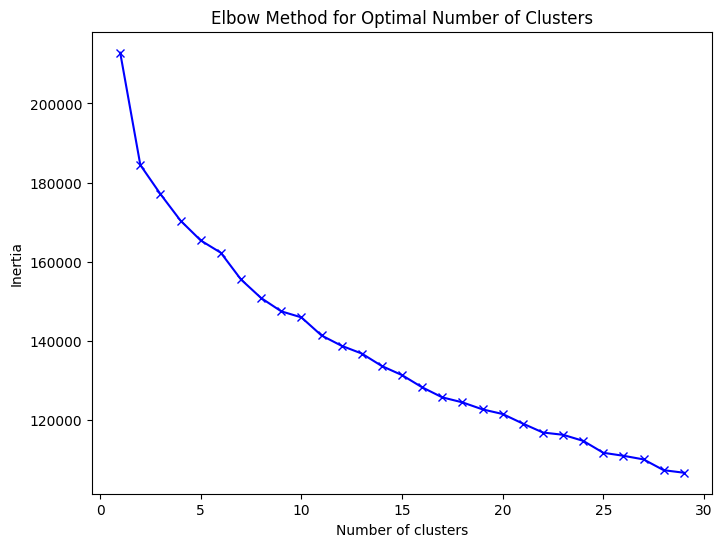

In [ ]:
# @title Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state= 1102)
    kmeans.fit(fingerprints)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

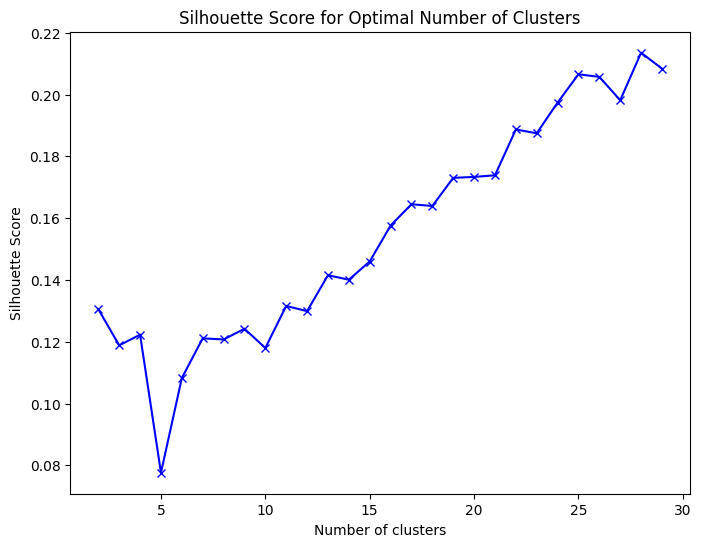

In [ ]:
# @title Silhoutte Scores

from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1102)
    kmeans.fit(fingerprints)
    score = silhouette_score(fingerprints, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
# @title Clustering
n_clusters = 20 #<-- we have created 20 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(fingerprints)

In [ ]:
from sklearn.manifold import TSNE

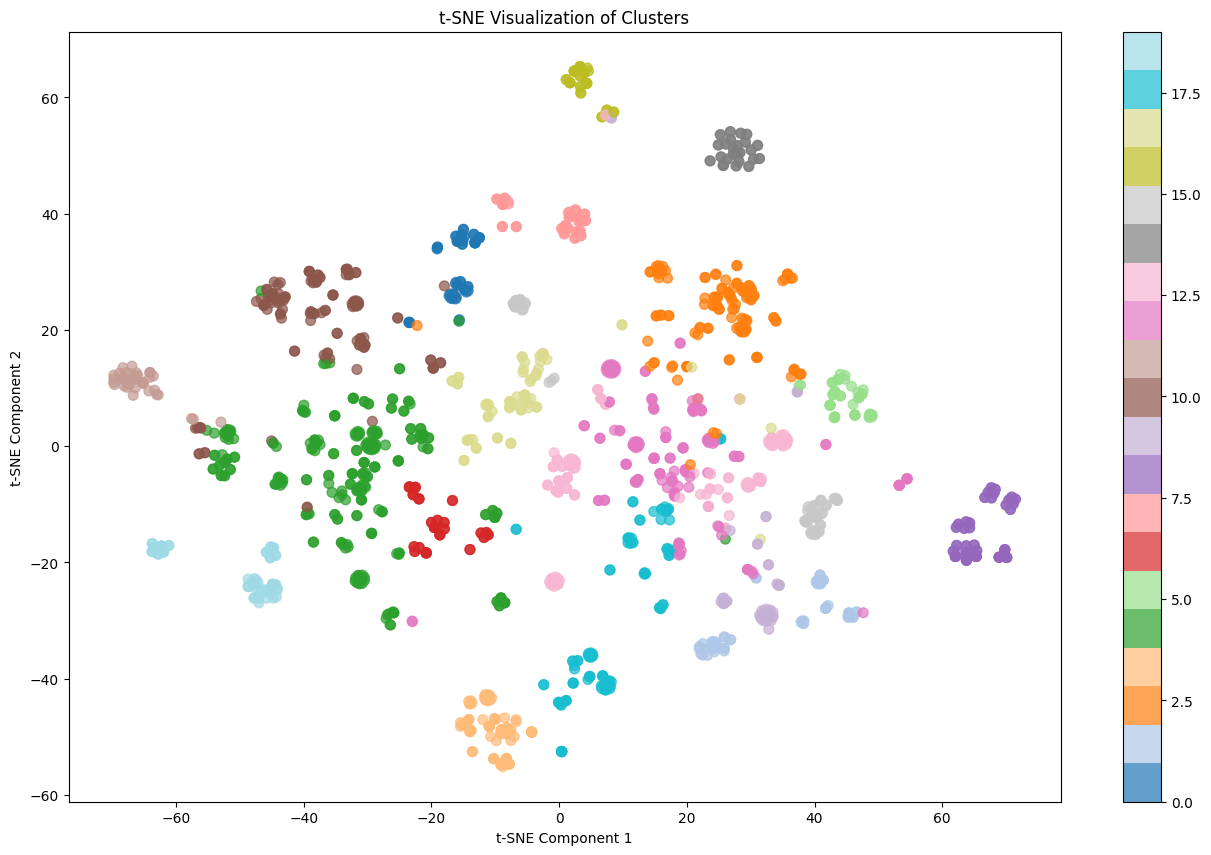

In [ ]:
# @title Visualization of Clusters
tsne = TSNE(n_components=2, random_state=42)

fingerprints_array = np.array(fingerprints)
tsne_results = tsne.fit_transform(fingerprints_array)

df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

# Plot the clusters
plt.figure(figsize=(16, 10))
plt.scatter(
    x=df['tsne-2d-one'],
    y=df['tsne-2d-two'],
    c=df['cluster'],
    cmap='tab20',  # You can choose other color maps as well
    s=50,
    alpha=0.7,
)
plt.colorbar()
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [ ]:
# Split the dataset based on clusters
train_clusters, test_clusters = train_test_split(df['cluster'].unique(), test_size=0.1, random_state=42)
train_clusters, val_clusters = train_test_split(train_clusters, test_size=0.2222, random_state=42)  # 0.2222 * 0.9 ≈ 0.2

In [ ]:
train_df = df[df['cluster'].isin(train_clusters)]
val_df = df[df['cluster'].isin(val_clusters)]
test_df = df[df['cluster'].isin(test_clusters)]

In [ ]:
train_df.to_csv(os.path.join(data_dir, 'train', 'cluster_train_data.csv'), index=False)
val_df.to_csv(os.path.join(data_dir, 'val', 'cluster_val_data.csv'), index=False)
test_df.to_csv(os.path.join(data_dir, 'test', 'cluster_test_data.csv'), index=False)

In [ ]:
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 1260
Validation size: 251
Test size: 93


In [ ]:
train_df

,Uniprot,Smiles,E3 Ligase,Cell Type,POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Activity,scaffold,fingerprints,cluster,tsne-2d-one,tsne-2d-two
6,Q07817,CN(CCOCCOCCOCCNc1cccc2c1C(=O)N(C1CCC(=O)NC1=O)...,CRBN,MOLT-4,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,True,O=C1CCC(N2C(=O)c3cccc(NCCOCCOCCOCCNCCC(CSc4ccc...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",13,7.284908,56.952061
8,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,H1975,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,False,O=C(CCCCCCCCCCC(=O)N1CCN(c2ccc(Nc3ncc4ccc(=O)n...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,-13.166321,34.995438
9,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,H1975,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(CCCCCCCCCCCN1CCN(c2ccc(Nc3ncc4ccc(=O)n(-c5...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,-16.161469,36.117332
11,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,H1975,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(CCCCCCCCC(=O)N1CCN(c2ccc(Nc3ncc4ccc(=O)n(-...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,-13.166321,34.995438
12,P00533,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4ccc(N5CC...,VHL,H1975,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,False,O=C(CCCCCCC(=O)N1CCN(c2ccc(Nc3ncc4ccc(=O)n(-c5...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,-12.485295,35.865566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,HEK293,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(COCCOCCOCCOC(=O)CC1N=C(c2ccccc2)c2ccsc2-n2...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",3,-13.783053,-48.913548
1596,Q15059,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,HEK293,MSTATTVAPAGIPATPGPVNPPPPEVSNPSKPGRKTNQLQYMQNVV...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(COCCCOCCOC(=O)CC1N=C(c2ccccc2)c2ccsc2-n2cn...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",3,-13.609460,-44.150330
1597,O60885,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,HEK293,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(COCCCOCCOC(=O)CC1N=C(c2ccccc2)c2ccsc2-n2cn...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",3,-13.840033,-43.785423
1598,Q15059,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,HEK293,MSTATTVAPAGIPATPGPVNPPPPEVSNPSKPGRKTNQLQYMQNVV...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,True,O=C(COCCCCCOCCOC(=O)CC1N=C(c2ccccc2)c2ccsc2-n2...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",3,-15.443564,-48.167873


In [ ]:
train_df["cluster"].unique()

array([13,  0,  4, 15, 17, 12, 19, 18,  5,  6,  3,  2,  8, 14],
      dtype=int32)